<a href="https://colab.research.google.com/github/alinayawar/deep/blob/main/project_dip.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

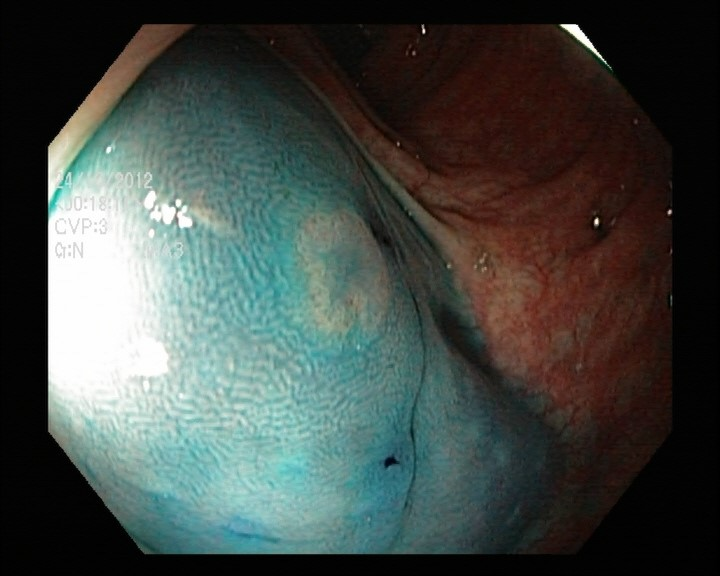

In [33]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow
img = cv2.imread("/content/ori.jpg")
cv2_imshow(img)



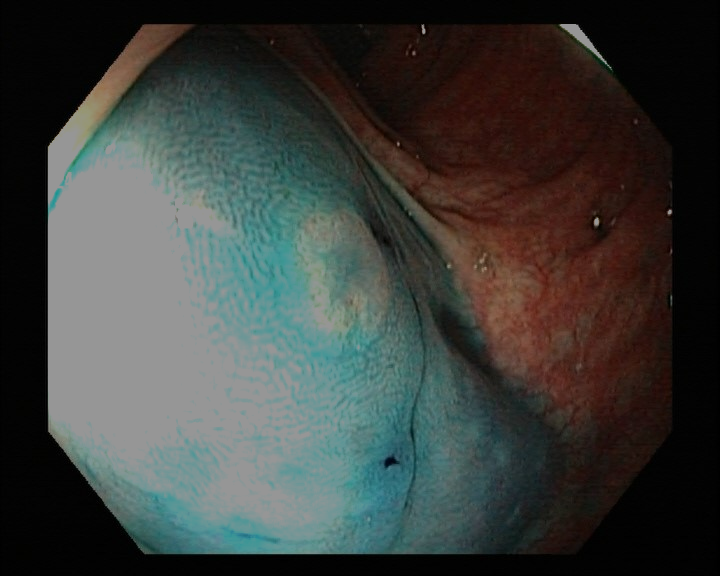

In [31]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow
img = cv2.imread("/content/ori.jpg")

ret,thresh3 = cv2.threshold(img,150,255,cv2.THRESH_TRUNC)
cv2_imshow(thresh3)

Truncate Thresholding ( THRESH_TRUNC )

In this type of thresholding: The destination pixel is set to the threshold ( thresh ), if the source pixel value is greater than the threshold. Otherwise, it is set to the source pixel value.

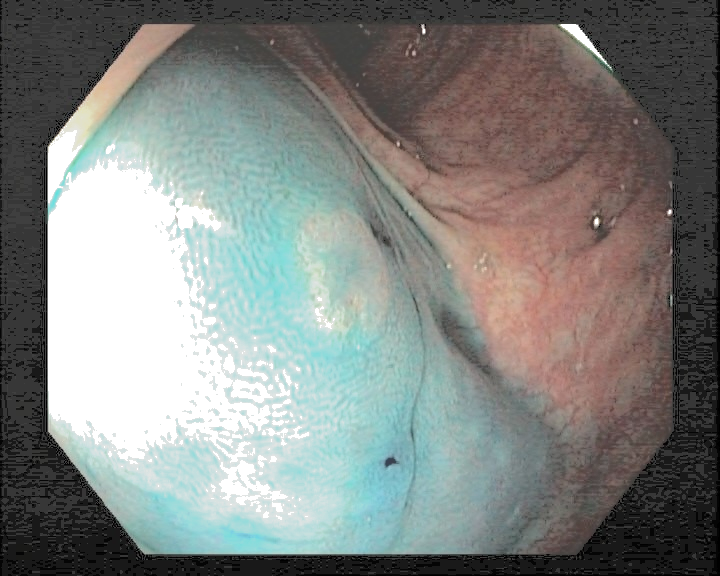

True

In [21]:

img_transf = cv2.cvtColor(thresh3, cv2.COLOR_BGR2YUV)
img_transf[:,:,0] = cv2.equalizeHist(img_transf[:,:,0])
img4 = cv2.cvtColor(img_transf, cv2.COLOR_YUV2BGR)
cv2.imwrite('test.jpg', img4)
cv2_imshow(img4)
#Save edited image.
cv2.imwrite('bw_.jpg', img4)



**Histogram Equalization**

**Remove black part of image**

In [34]:
import numpy as np
import cv2
img = cv2.imread("/content/ori.jpg") # Input 8-bit 3-channel image
      
mask = np.zeros(img.shape[:2], np.uint8) # img.shape[:2] = first, second values of img.shape
bgdModel = np.zeros((1,65), np.float64) # temporary array for background
fgdModel = np.zeros((1,65), np.float64) # temporary array for foreground
rect = (1,0,img.shape[1],img.shape[0]) # specify w,h beyond bounds of img.shape

# Grabcut algorithm to extract foreground (5 iterations) within region of interest
cv2.grabCut(img, mask, rect, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_RECT)

# Split RGB channels and create new alpha channel
r_channel, g_channel, b_channel = cv2.split(img) 
a_channel = np.where((mask==2)|(mask==0), 0, 255).astype('uint8')  
        
img_RGBA = cv2.merge((r_channel, g_channel, b_channel, a_channel)) # add alpha channel to image
cv2.imwrite(".//output_image.png", img_RGBA)  ## write new image to file

True

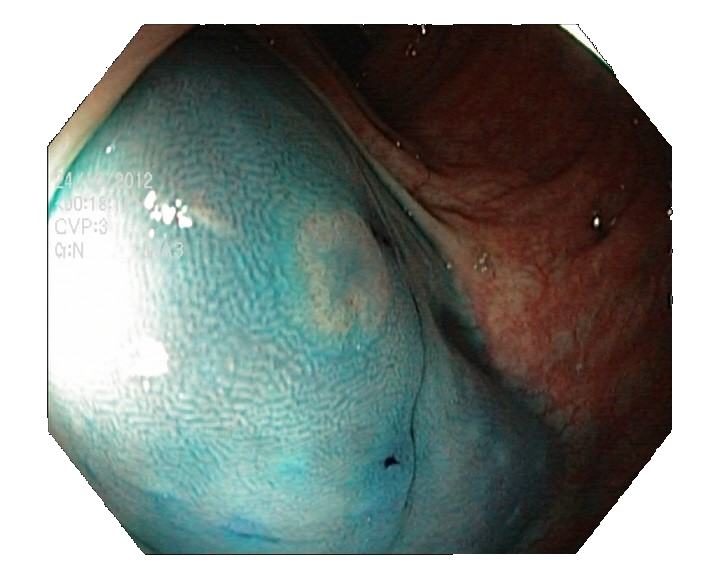

In [35]:
cv2_imshow(img_RGBA)

In [42]:
def is_cv2():
    # if we are using OpenCV 2, then our cv2.__version__ will start
    # with '2.'
    return check_opencv_version("2.")
def is_cv3():
    # if we are using OpenCV 3.X, then our cv2.__version__ will start
    # with '3.'
    return check_opencv_version("3.")
def is_cv4():
    # if we are using OpenCV 3.X, then our cv2.__version__ will start
    # with '4.'
    return check_opencv_version("4.")
def check_opencv_version(major, lib=None):
    # if the supplied library is None, import OpenCV
    if lib is None:
        import cv2 as lib
        
    # return whether or not the current OpenCV version matches the
    # major version number
    return lib.__version__.startswith(major)

In [43]:
pip install imutils

In [44]:
pip install --upgrade imutils